# Solving the 2D Poisson Equation

The incompressible form of the Navier Stokes equation leads to a problem where there is no clear coupling between velocity and pressure when looking at the continuity and momentum equations.

$$\begin{eqnarray*}
\nabla \cdot\vec{v} &=& 0 \\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &=& -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{eqnarray*}$$

The continuity equation becomes more of a kinematic constraint, instead of a 4th equation. We seek a numerical solution that imposes the divergence constraint from continuity. We can impose a pressure field that meets this criteria by taking the divergence of the momentum equation, in which case a Poisson equation for pressure arises.

Poisson's equation is obtained by adding a source term to the Laplace equation:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

In discretized form:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

Solving for the desired pressure $p^n_{i,j}$:

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

We'll set an initial state of $p=0$ everywhere, and boundary conditions $p=0$ at $x=0, 2$ and $y=0,1$.

The source term will have two initial spikes inside the domain:
$b_{i,j} = 100$ at $i=\frac{1}{4}nx, j=\frac{1}{4}ny$
$b_{i,j} = -100$ at $i=\frac{3}{4}nx, j=\frac{3}{4}ny$
$b_{i,j}=0$ everywhere else.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
# Initialize parameters
nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 1

dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)

p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

# Source term
b[ny//4, nx//4] = 100
b[3*ny//4, 3*nx//4] = -100

In [17]:
def poisson(nt):
    # Initialize parameters
    nx = 50
    ny = 50
    xmin = 0
    xmax = 2
    ymin = 0
    ymax = 1

    dx = (xmax-xmin)/(nx-1)
    dy = (ymax-ymin)/(ny-1)
    x = np.linspace(xmin, xmax, nx)
    y = np.linspace(ymin, ymax, ny)

    p = np.zeros((ny, nx))
    b = np.zeros((ny, nx))

    # Source term
    b[ny//4, nx//4] = 100
    b[3*ny//4, 3*nx//4] = -100

    ## MAIN LOOP ##
    for n in range(nt):
        pd = np.copy(p)
        p[1:-1,1:-1] = (((pd[1:-1,2:] + pd[1:-1,:-2])*dy**2 + 
                        (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -
                        b[1:-1,1:-1]*dx**2*dy**2) /
                        (2*(dx**2+dy**2)))
        p[:,0] = 0
        p[:, np.argwhere(x==2)] = 0
        p[0,:] = 0
        p[np.argwhere(y==1), :]
    plot2d(x, y, p)

In [18]:
def plot2d(x, y, p):
    fig = plt.figure(figsize=(11,7), dpi=300)
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p, cmap=cm.viridis, rstride=1, cstride=1,
                          antialiased=False, linewidth=0)
    ax.view_init(30, 225)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

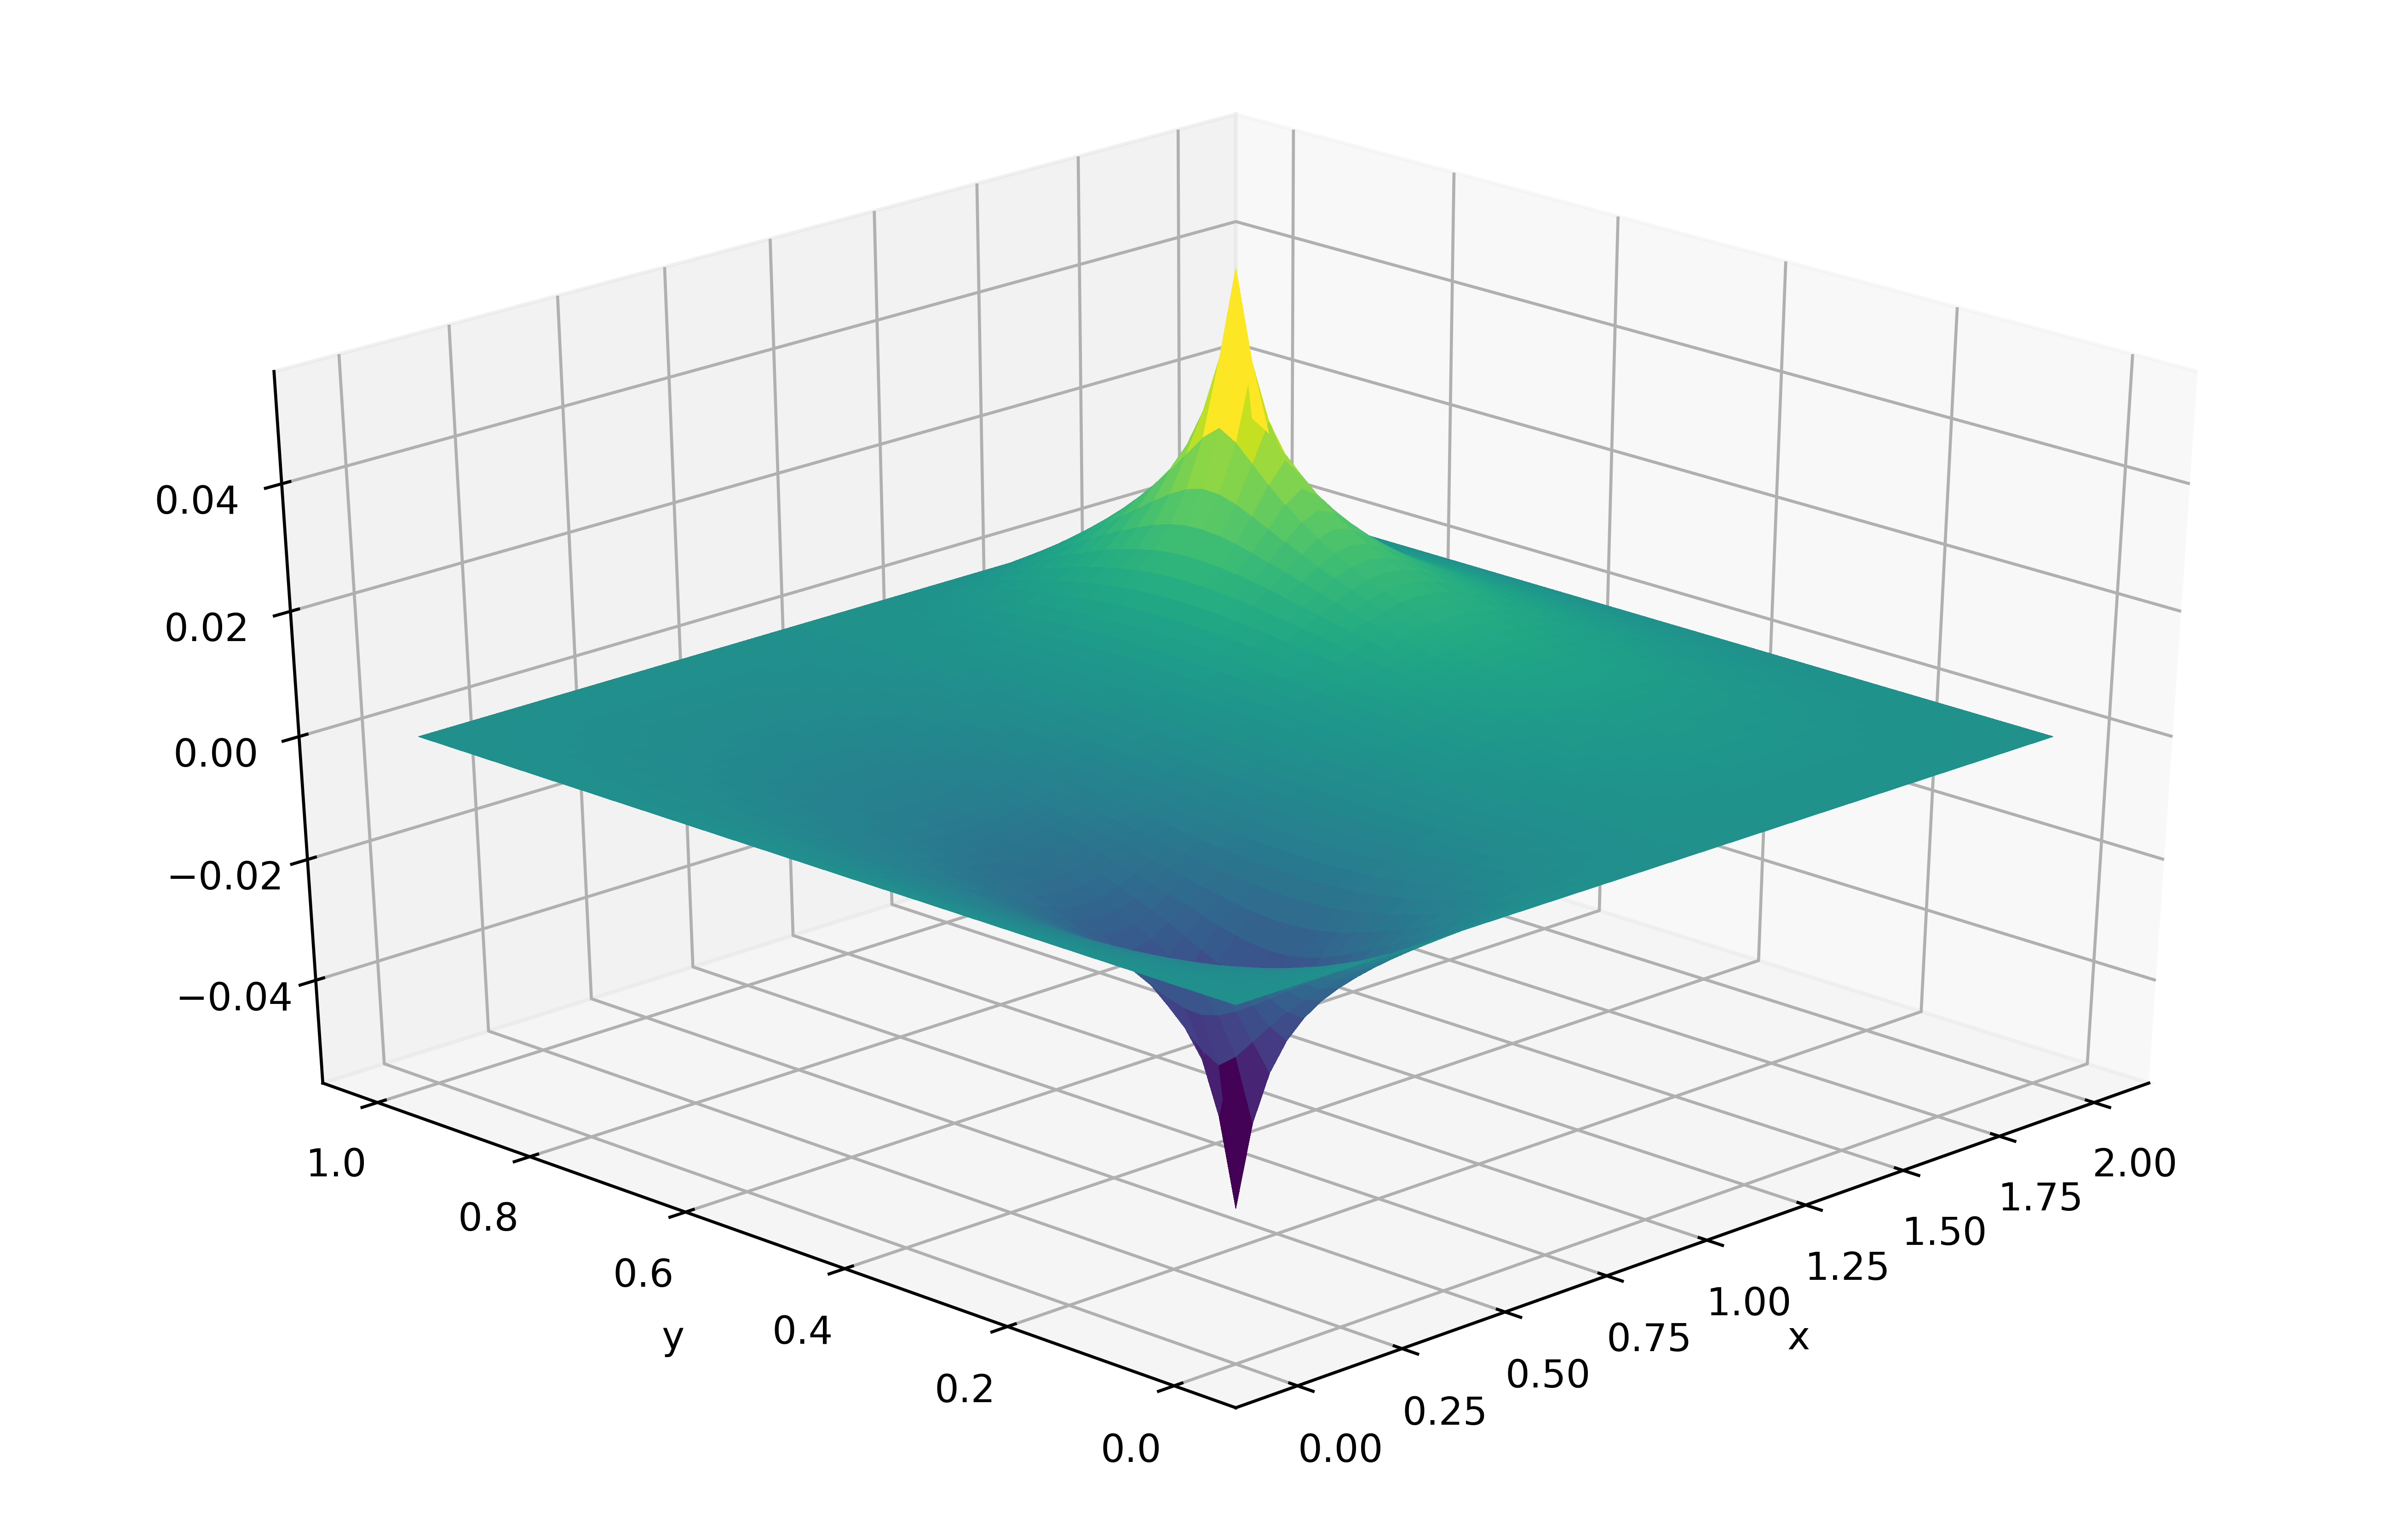

In [25]:
poisson(1500)